
# Car Evaluation Dataset
https://archive.ics.uci.edu/dataset/19/car+evaluation

##Data Loading

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [ ]:
# variable information
print(car_evaluation.variables)

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


In [ ]:
X_df = pd.DataFrame(X, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
y_df = pd.DataFrame(y, columns=['class'])

df = pd.concat([X_df, y_df], axis=1)

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


##Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

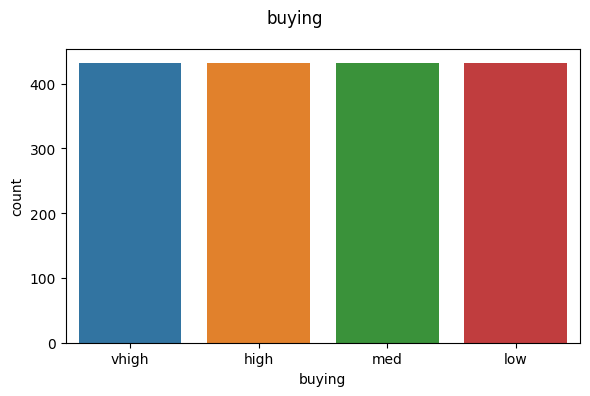

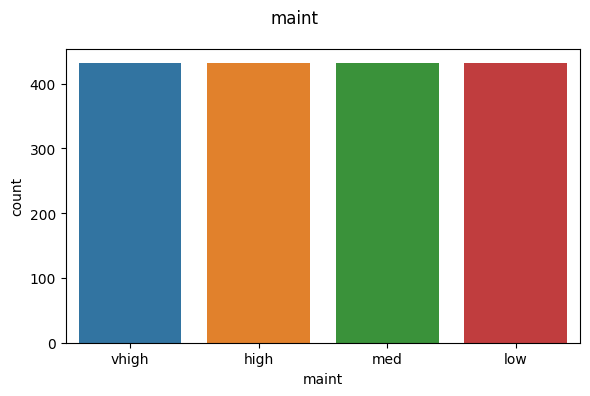

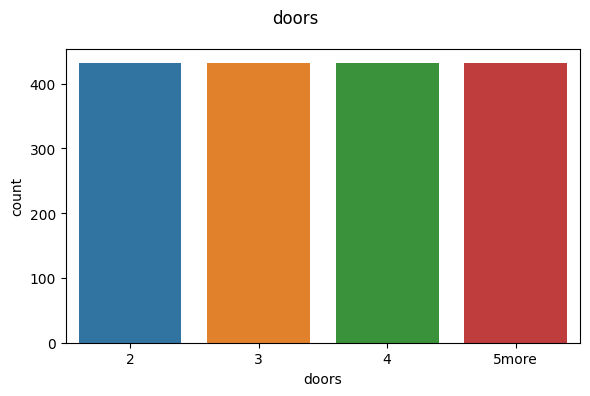

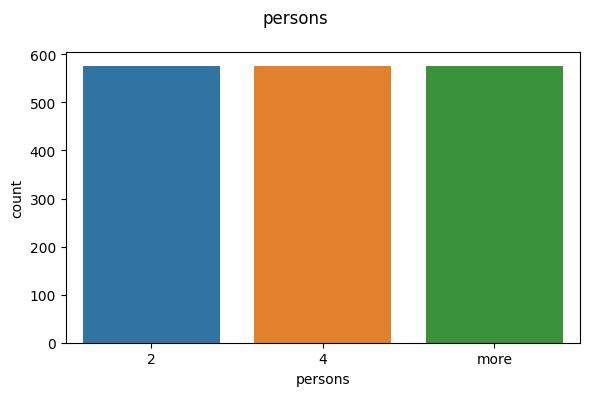

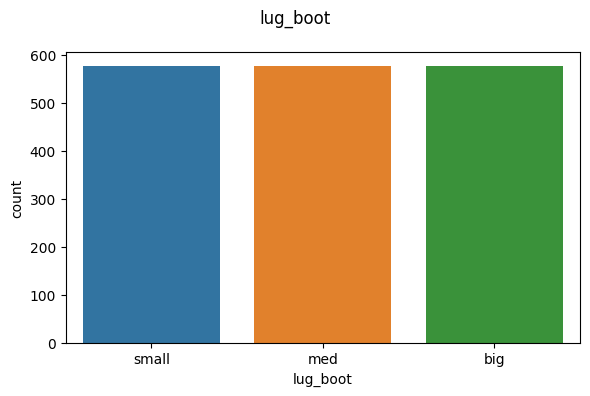

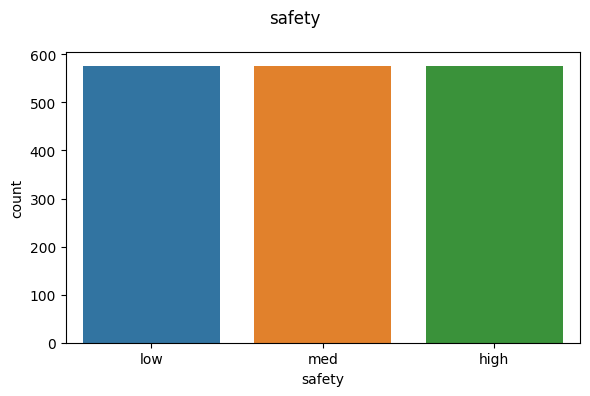

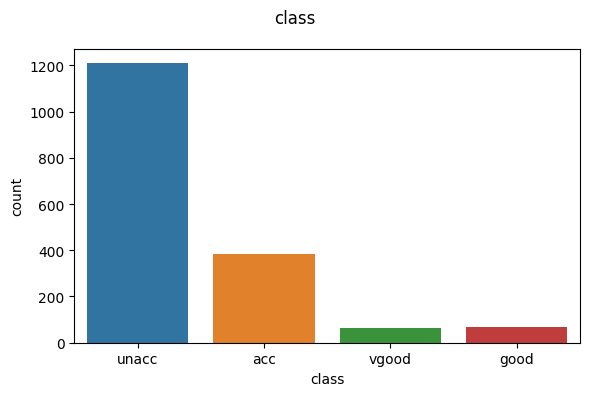

In [ ]:
num_list = []
cat_list = []

for column in df:
  if is_numeric_dtype(df[column]):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create subplots for numeric data
    fig.suptitle(column)
    sns.histplot(df[column], kde=True, ax=axes[0])
    sns.boxplot(x=df[column], ax=axes[1])
    num_list.append(column)
  elif is_string_dtype(df[column]):
    fig, ax = plt.subplots(figsize=(6, 4))  # Create a single subplot for categorical data
    fig.suptitle(column)
    sns.countplot(data=df, x=df[column], ax=ax)
    cat_list.append(column)
  plt.tight_layout()
  plt.show()  # Show the plot for the current iteration

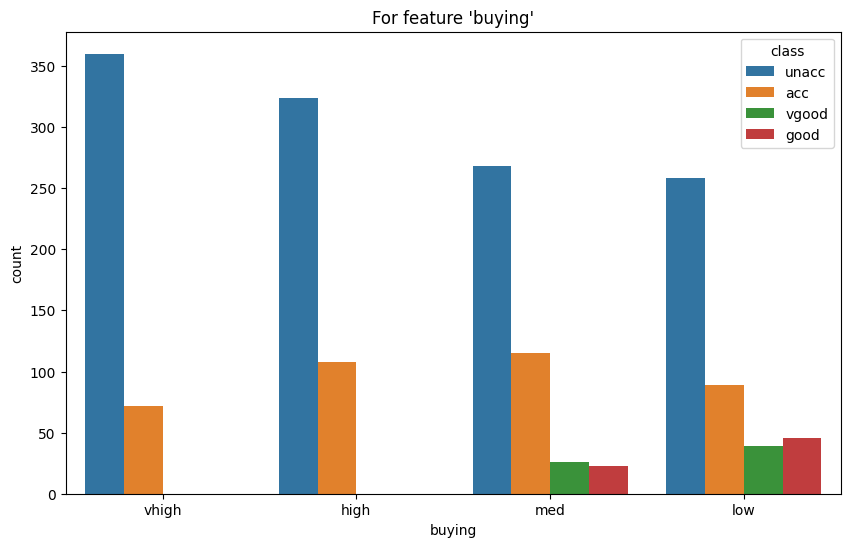

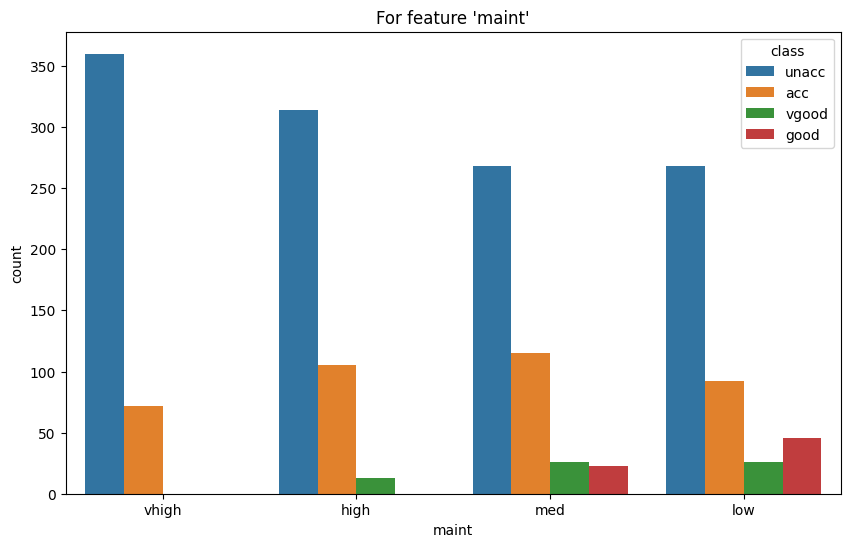

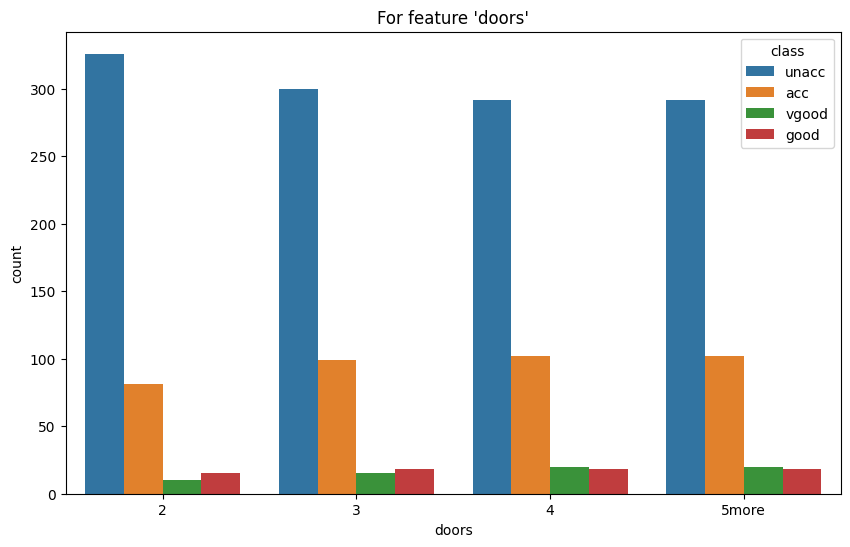

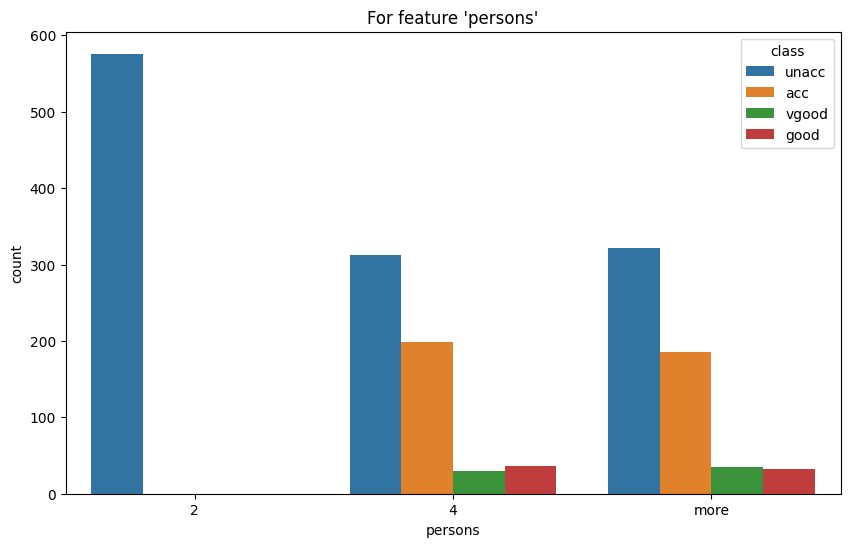

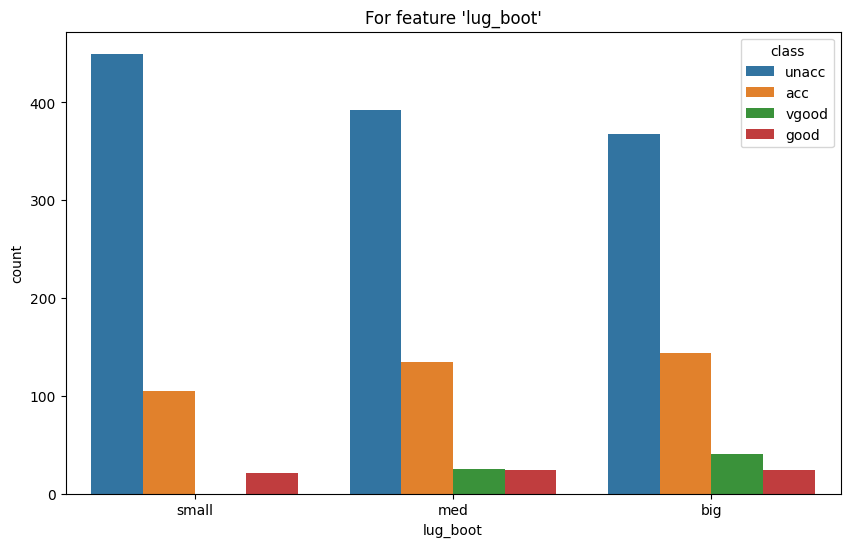

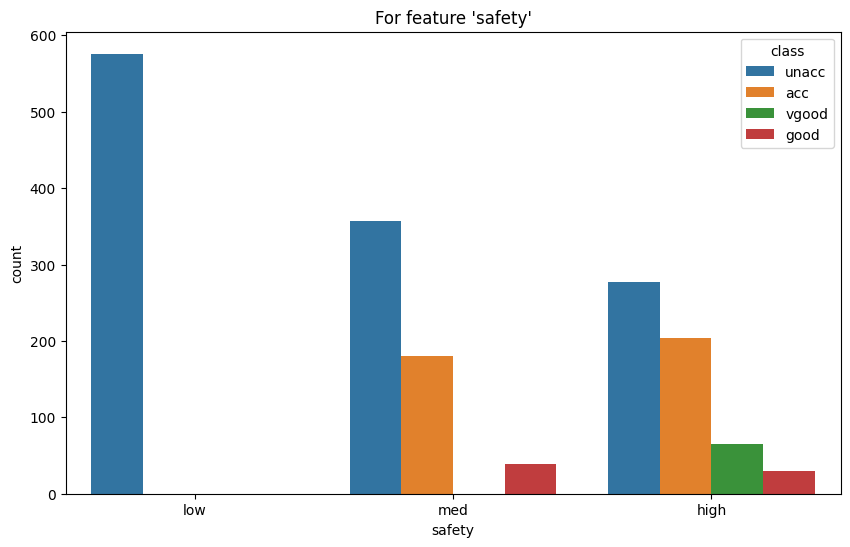

In [ ]:
for i in df.columns[:-1]:
    plt.figure(figsize=(10,6))
    plt.title("For feature '%s'" % i)
    sns.countplot(data=df, x=i, hue='class')

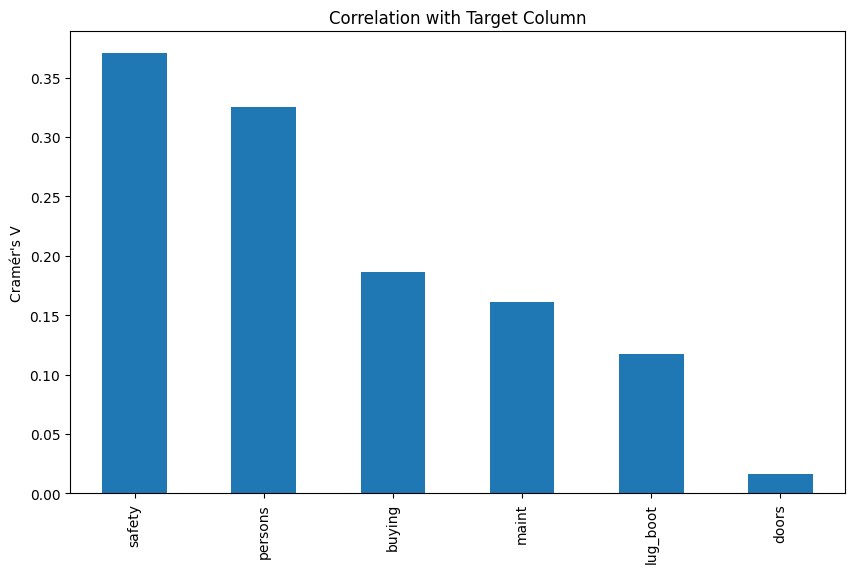

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming df is your DataFrame and 'Target' is your target column
cols = df.columns.drop('class')  # Exclude the target column from the features
correlations = {}

for col in cols:
    corr = cramers_v(df[col], df['class'])  # Compute correlation with the target
    correlations[col] = corr

# Convert to a Series for easy plotting
corr_series = pd.Series(correlations)

# Sort the values for better visualization
corr_series = corr_series.sort_values(ascending=False)

# Visualize the correlations
plt.figure(figsize=(10, 6))
corr_series.plot(kind='bar')
plt.title('Correlation with Target Column')
plt.ylabel('Cramér\'s V')
plt.show()

##Pre-Processing

***Handling Null values***

In [ ]:
#Checking Null Values
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

***Checking for Duplicates***

In [ ]:
#Checking Duplicates
data_duplicates_rows=df[df.duplicated()]
data_duplicates_rows

,buying,maint,doors,persons,lug_boot,safety,class


There are no Duplicate Rows in the data

In [ ]:
#Removing Duplicates in any
df=df.drop_duplicates()
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


***Handling Categorical Features***

In [ ]:
!pip install category_encoders

In [ ]:
X=df.drop('class',axis=1)
y=df['class']

Perform Ordinal Encoding

In [ ]:
# Ordinal Encoding
import category_encoders as ce

In [ ]:
# Encoding the columns
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X=encoder.fit_transform(X)

In [ ]:
X

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


***Feature Scaling***

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
#X.head()

,buying,maint,doors,persons,lug_boot,safety
0,-1.341641,-1.341641,-1.341641,-1.224745,-1.224745,-1.224745
1,-1.341641,-1.341641,-1.341641,-1.224745,-1.224745,0.000000
2,-1.341641,-1.341641,-1.341641,-1.224745,-1.224745,1.224745
3,-1.341641,-1.341641,-1.341641,-1.224745,0.000000,-1.224745
4,-1.341641,-1.341641,-1.341641,-1.224745,0.000000,0.000000


##Model Building and Training

***Decision Tree Classifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_predict, KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Initialize the classifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
scaler=StandardScaler()

# Specify number of folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a pipeline that first scales the data then applies the classifier
pipeline = make_pipeline(StandardScaler(), classifier)

# Initialize lists to store metrics for each fold
precision_list = []
recall_list = []
f1_list = []
accuracy_list = []
confusion_matrices = []

# Perform cross-validation
fold_num=1
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Use iloc to slice DataFrame by index
    y_train, y_test = y[train_index], y[test_index]

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    confusion_matrices.append(conf_matrix)

    # Print metrics for each fold
    print(f"Fold {fold_num} Metrics - Precision: {precision}, Recall: {recall}, F1 Score: {f1}, Accuracy: {accuracy}")
    fold_num += 1

Fold 1 Metrics - Precision: 0.9624500615259921, Recall: 0.953757225433526, F1 Score: 0.9558290830783179, Accuracy: 0.953757225433526
Fold 2 Metrics - Precision: 0.9896419914227113, Recall: 0.9884393063583815, F1 Score: 0.9886200234542187, Accuracy: 0.9884393063583815
Fold 3 Metrics - Precision: 0.976878612716763, Recall: 0.976878612716763, F1 Score: 0.976878612716763, Accuracy: 0.976878612716763
Fold 4 Metrics - Precision: 0.9727434415295687, Recall: 0.9710982658959537, F1 Score: 0.9715282090479149, Accuracy: 0.9710982658959537
Fold 5 Metrics - Precision: 0.9845857418111754, Recall: 0.9826589595375722, F1 Score: 0.9828241123038811, Accuracy: 0.9826589595375722
Fold 6 Metrics - Precision: 0.9837811514112091, Recall: 0.9826589595375722, F1 Score: 0.9827892140798384, Accuracy: 0.9826589595375722
Fold 7 Metrics - Precision: 0.9839928857269897, Recall: 0.9826589595375722, F1 Score: 0.9829004703844982, Accuracy: 0.9826589595375722
Fold 8 Metrics - Precision: 0.9838413032054649, Recall: 0.982

In [ ]:
# Calculate the final metrics
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)
avg_accuracy = np.mean(accuracy_list)
final_confusion_matrix = confusion_matrices[9]

# Print the final metrics and confusion matrix
print("Performance over k-folds - Precision:", avg_precision)
print("Performance over k-folds - Recall:", avg_recall)
print("Performance over k-folds - F1 Score:", avg_f1)
print("Performance over k-folds - Accuracy:", avg_accuracy)
print("\n Performance over k-folds Matrix:\n", final_confusion_matrix)

Performance over k-folds - Precision: 0.979998151136338
Performance over k-folds - Recall: 0.9780111574136308
Performance over k-folds - F1 Score: 0.978309948129653
Performance over k-folds - Accuracy: 0.9780111574136308

 Performance over k-folds Matrix:
 [[ 45   0   0   0]
 [  0   9   0   0]
 [  1   0 108   0]
 [  1   1   0   7]]


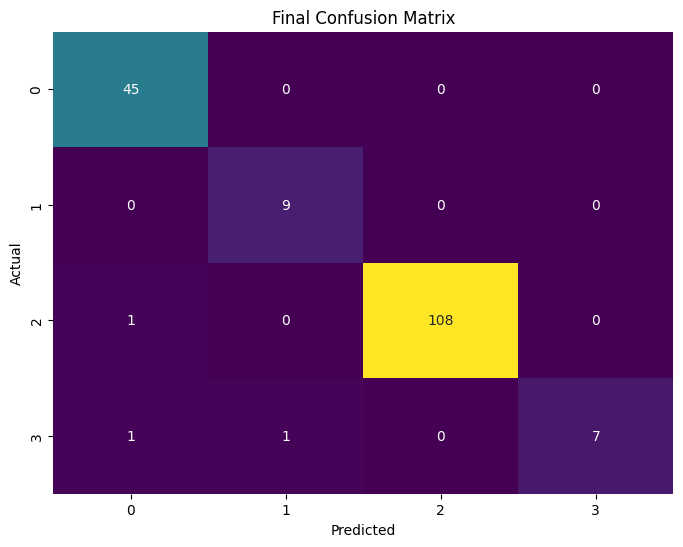

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix')
plt.show()

***SVM Classifier***

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# SVM using poly kernel
svm = SVC(kernel='poly', random_state=42)

# Specify number of folds
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a pipeline that first scales the data then applies the classifier
pipeline = make_pipeline(StandardScaler(), svm)

# Initialize lists to store metrics for each fold
precision_list2 = []
recall_list2 = []
f1_list2 = []
accuracy_list2 = []
confusion_matrices2 = []

# Perform cross-validation
fold_num=1
for train_index, test_index in kfold2.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Use iloc to slice DataFrame by index
    y_train, y_test = y[train_index], y[test_index]

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    precision_list2.append(precision)
    recall_list2.append(recall)
    f1_list2.append(f1)
    accuracy_list2.append(accuracy)
    confusion_matrices2.append(conf_matrix)

    # Print metrics for each fold
    print(f"Fold {fold_num} Metrics - Precision: {precision}, Recall: {recall}, F1 Score: {f1}, Accuracy: {accuracy}")
    fold_num += 1

Fold 1 Metrics - Precision: 0.8439922480620154, Recall: 0.8439306358381503, F1 Score: 0.8342612670030931, Accuracy: 0.8439306358381503
Fold 2 Metrics - Precision: 0.8521860779731891, Recall: 0.8554913294797688, F1 Score: 0.8404740731330327, Accuracy: 0.8554913294797688
Fold 3 Metrics - Precision: 0.8871528532313442, Recall: 0.8901734104046243, F1 Score: 0.8848302067232702, Accuracy: 0.8901734104046243
Fold 4 Metrics - Precision: 0.923699421965318, Recall: 0.9248554913294798, F1 Score: 0.9236520198142603, Accuracy: 0.9248554913294798
Fold 5 Metrics - Precision: 0.9110744104963759, Recall: 0.9132947976878613, F1 Score: 0.911724230339627, Accuracy: 0.9132947976878613
Fold 6 Metrics - Precision: 0.8658780648695789, Recall: 0.861271676300578, F1 Score: 0.8453161540837488, Accuracy: 0.861271676300578
Fold 7 Metrics - Precision: 0.848684303053317, Recall: 0.8554913294797688, F1 Score: 0.8468428716410007, Accuracy: 0.8554913294797688
Fold 8 Metrics - Precision: 0.8846156959893785, Recall: 0.88

In [ ]:
# Calculate the final metrics
avg_precision = np.mean(precision_list2)
avg_recall = np.mean(recall_list2)
avg_f1 = np.mean(f1_list2)
avg_accuracy = np.mean(accuracy_list2)
final_confusion_matrix = confusion_matrices2[9]

# Print the final metrics and confusion matrix
print("Performance over k-folds - Precision:", avg_precision)
print("Performance over k-folds - Recall:", avg_recall)
print("Performance over k-folds - F1 Score:", avg_f1)
print("Performance over k-folds - Accuracy:", avg_accuracy)
print("\n Performance over k-folds Matrix:\n", final_confusion_matrix)

Performance over k-folds - Precision: 0.8755030459979312
Performance over k-folds - Recall: 0.8767273827127303
Performance over k-folds - F1 Score: 0.8691378285475156
Performance over k-folds - Accuracy: 0.8767273827127303

 Performance over k-folds Matrix:
 [[ 31   0  14   0]
 [  2   5   2   0]
 [  6   0 103   0]
 [  2   0   0   7]]


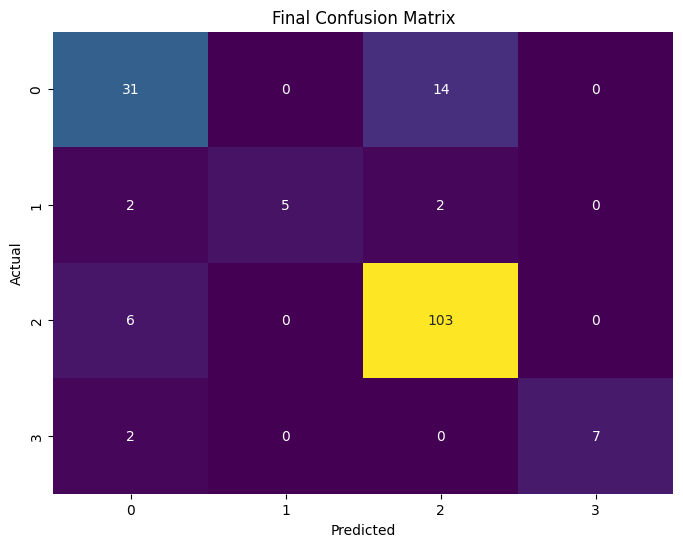

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix')
plt.show()

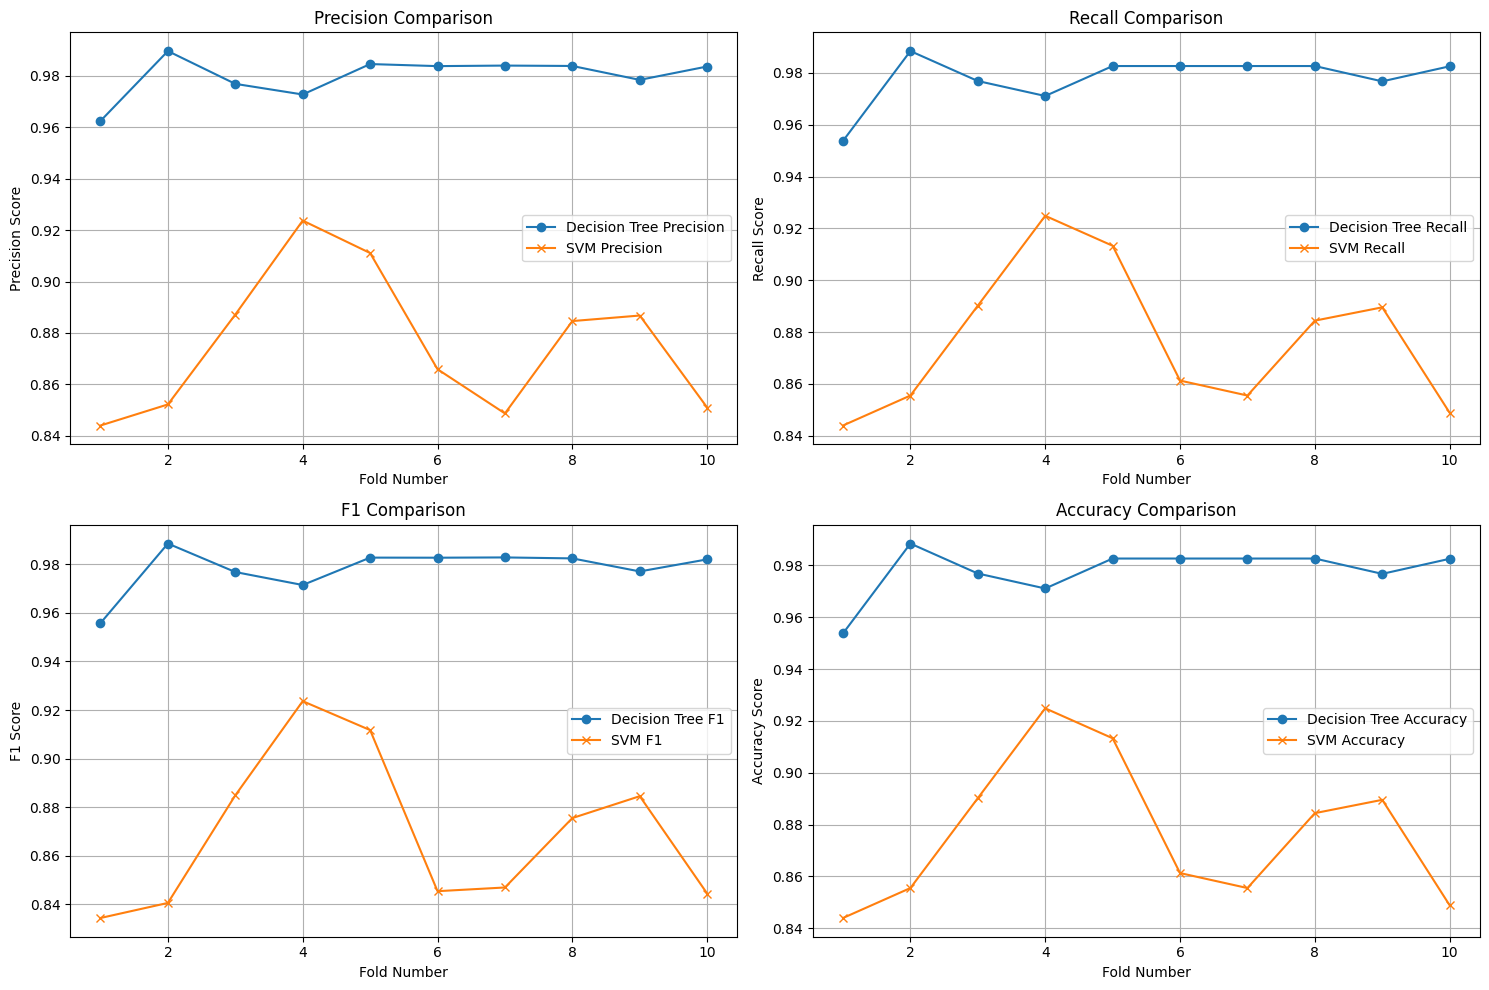

In [ ]:
import matplotlib.pyplot as plt

# Assuming model1_metrics and model2_metrics are your two sets of metrics
model1_metrics = {
    'precision': precision_list,
    'recall': recall_list,
    'f1': f1_list,
    'accuracy': accuracy_list
}

model2_metrics = {
    'precision': precision_list2,
    'recall': recall_list2,
    'f1': f1_list2,
    'accuracy': accuracy_list2
}

# Number of folds
folds = range(1, 11)

# Create subplots - one for each metric
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 layout
axs = axs.flatten()  # Flatten to 1D array for easy indexing

# Plotting
for i, metric in enumerate(model1_metrics):
    axs[i].plot(folds, model1_metrics[metric], label=f'Decision Tree {metric.title()}', marker='o')
    axs[i].plot(folds, model2_metrics[metric], label=f'SVM {metric.title()}', marker='x')
    axs[i].set_title(f'{metric.title()} Comparison')
    axs[i].set_xlabel('Fold Number')
    axs[i].set_ylabel(f'{metric.title()} Score')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
